# A Look Into YouTube Video Statistics

**Hello!** My name is Manaar Salama, and this Jupyter Notebook is a small, basic project that I used in a data science challenge for an internship program I applied for.

For this project, I spent some time considering which topic I would be most interested in finding a dataset on. I ended up deciding on taking a look into **YouTube video statistics**, as I'm a regular consumer of content on YouTube and haven't had a chance to explore a dataset in this topic yet.

I downloaded this dataset by user Advay Patil from Kaggle. The link to the original dataset can be found [here.](https://www.kaggle.com/datasets/advaypatil/youtube-statistics)

There were a few main questions I wanted to explore after taking an initial look at this dataset. 
- Is there any basic relationship between the number of likes and comments?
- What can we find when taking a look at the `machine learning` keyword in the YouTube search?
- What information can we discover when we group our data together by keyword?

**Note:** The original version of this notebook was created in the latter half of 2022. However, since this notebook is publicly available on my GitHub, I wanted to clean it up a bit, so I'm making another pass through it in January 2025 to clean up the graphs and add more explanatory text.

## Importing Libraries & Initializing DataFrame

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

In [2]:
stats = pd.read_csv("stats.csv", index_col = [0])
stats.head(5)

,Title,Video ID,Published At,Keyword,Likes,Comments,Views
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0
1,The most EXPENSIVE thing I own.,b3x28s61q3c,2022-08-24,tech,76779.0,4306.0,1758063.0
2,My New House Gaming Setup is SICK!,4mgePWWCAmA,2022-08-23,tech,63825.0,3338.0,1564007.0
3,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,2022-08-23,tech,71566.0,1426.0,922918.0
4,Best Back to School Tech 2022!,ErMwWXQxHp0,2022-08-08,tech,96513.0,5155.0,1855644.0


Using basic methods and functions like `df.shape` and `df.describe()`, we can discover some barebones information about our dataset, including how many rows and columns it has, as well as what some of the statistics (such as the median, minimum, and maximum values) about the numerical columns that the dataset contains.

In [3]:
stats.shape

(1881, 7)

In [4]:
stats.describe()

,Likes,Comments,Views
count,1.879000e+03,1879.000000,1.879000e+03
mean,1.700610e+05,7863.331559,1.161292e+07
std,7.962293e+05,37879.964926,1.084450e+08
min,-1.000000e+00,-1.000000,2.500000e+01
25%,2.672500e+03,199.000000,8.451500e+04
50%,1.478700e+04,814.000000,5.917210e+05
75%,6.090600e+04,3377.500000,2.804978e+06
max,1.644556e+07,732818.000000,4.034122e+09


Our dataset contains `1881` rows and `7` columns. Additionally, the YouTube videos sampled in this dataset appear to be quite skewed in one direction with regards to engagement metrics -- for example, while the median number of comments per video is only `814`, the mean number of comments lies at `7,863`, signifying that this dataset contains some very popular videos with high engagement rates.

We can also observe that the minimum values for likes and comments on a video appears to be `-1`. This is a bit peculiar, so we can further investigate which videos have this negative number.

In [5]:
stats[stats['Comments'] == -1]

,Title,Video ID,Published At,Keyword,Likes,Comments,Views
1701,SURVIVOR 🦀🦂 Best Action Movies 2022 🦀🦂 Latest ...,__7MkaWFObQ,2022-08-20,movies,105.0,-1.0,28219.0
1709,BEST Auditions Of Songs From Movies | Amazing ...,ZcBBGC8_mfU,2022-07-25,movies,20138.0,-1.0,5351960.0


Using the `Video ID` field, we can look up these videos on YouTube by plugging this ID into the URL directly with the structure `www.youtube.com/watch?v=video_ID_here`, in which the video ID acts as a URL parameter.

Upon looking into these videos myself, I found that at the time of writing this (January 2025), these videos are unavailable on YouTube. This could explain the negative number of comments -- an unavailable videos' number of comments could potentially be represented as -1. However, it is also possible that these videos only recently became unavailable and were actually available to watch at the time that this dataset was published. Because of this, we cannot be totally sure that these videos being unavailable is what caused the number of comments to be represented as -1.

## Data Cleaning and Manipulation: Removing Simple Null Values

In [6]:
stats.isna().sum()

Title           0
Video ID        0
Published At    0
Keyword         0
Likes           2
Comments        2
Views           2
dtype: int64

This dataset appears to be relatively clean, with only a couple of rows containing null values for their number of likes, comments, and views. Before we do anything to these rows, we can look into which videos contained nulls for these fields.

In [7]:
stats[stats['Comments'].isna()]

,Title,Video ID,Published At,Keyword,Likes,Comments,Views
1879,What is Machine Learning?,f_uwKZIAeM0,2017-01-11,machine learning,NaN,NaN,NaN
1880,Don&#39;t learn machine learning,cyLWtMSry58,2020-03-30,machine learning,NaN,NaN,NaN


Strangely enough, both of these videos are available on YouTube and can be reached via their video IDs at the time of writing this. Although we could impute these values since we have them available at the moment, there's a small data integrity issue here.

The data for this set was cultivated in 2022, which means that for all of the other videos in this dataset, the view, like, and comment counts are from 2022. We have no easy way of knowing how many views, comments, or likes have been added to these two videos from 2022 - 2025. Therefore, imputing in the values for these two videos could potentially raise the view, like, and comment counts for videos in the `machine learning` keyword category. Therefore, it is probably best from a data integrity standpoint to just remove these rows altogether.

In [8]:
stats = stats.dropna()

In [9]:
stats.isna().sum()

Title           0
Video ID        0
Published At    0
Keyword         0
Likes           0
Comments        0
Views           0
dtype: int64

## Data Cleaning and Manipulation: Reducing Number of `Keyword`s

Next, to make our dataset easier to visualize, let's narrow down the `Keyword` field by keeping only the keywords that we're definitely interested in for the purposes of this analysis.

In [10]:
stats["Keyword"].unique()

array(['tech', 'news', 'gaming', 'sports', 'how-to', 'business',
       'tutorial', 'finance', 'crypto', 'cubes', 'chess', 'apple',
       'google', 'interview', 'history', 'literature', 'bed', 'trolling',
       'asmr', 'music', 'food', 'mukbang', 'reaction', 'lofi', 'animals',
       'education', 'minecraft', 'sat', 'mrbeast', 'cnn', 'mathchemistry',
       'biology', 'physics', 'computer science', 'nintendo', 'xbox',
       'marvel', 'movies', 'data science', 'game development',
       'machine learning'], dtype=object)

When originally writing this notebook in 2022, I was most interested in the below keywords, due to the popularity of some of these topics at the time:

In [11]:
stats = stats[stats["Keyword"].isin(["animals", "business", "data science", "education", "food", 
                                     "gaming", "machine learning", "minecraft", "movies", "mrbeast", 
                                     "music", "news", "reaction", "sports", "tech", "trolling"])]
stats["Keyword"].unique()

array(['tech', 'news', 'gaming', 'sports', 'business', 'trolling',
       'music', 'food', 'reaction', 'animals', 'education', 'minecraft',
       'mrbeast', 'movies', 'data science', 'machine learning'],
      dtype=object)

## Analysis and Visualization: Exploring Relationship Between `Likes` and `Comments`

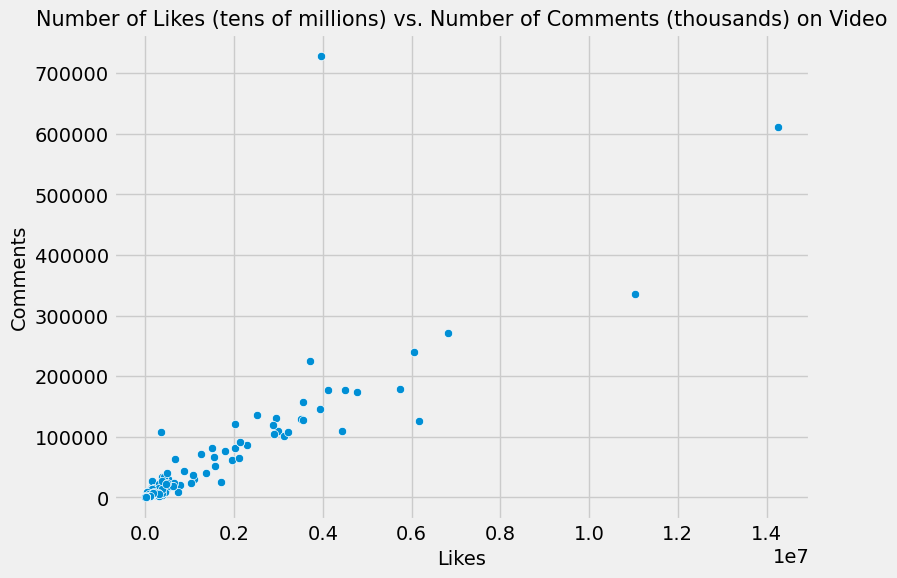

In [12]:
plt.figure(figsize=(8, 6));

ax = sns.scatterplot(data=stats, x="Likes", y="Comments")
plt.title('Number of Likes (tens of millions) vs. Number of Comments (thousands) on Video', fontsize=15);

plt.show()

## Analysis and Visualization: Machine Learning Interest Over Time

For the following graph, I wanted to show how the interest in the `machine learning` keyword changed over time. In order to do this, I utilized the published date of the videos, as each of the rows in this dataset represents one video. However, something to note from how I chose to do this is that this method does not necessarily visualize machine learning interest over time. Rather, it visualizes how the individual machine learning videos published at different points in time were faring in 2022, when this dataset was cultivated.

In [13]:
ml = stats[stats["Keyword"] == "machine learning"]
ml_grouped = ml.groupby("Published At").agg("mean", numeric_only=True).reset_index()
ml_grouped.head(5)

,Published At,Likes,Comments,Views
0,2015-06-13,29980.0,897.0,1167616.0
1,2017-05-19,13141.0,382.0,181827.0
2,2017-08-24,38776.0,566.0,2278698.0
3,2017-08-31,30764.0,929.0,856628.0
4,2017-10-05,17219.0,417.0,762553.0


In [14]:
ml_grouped['Published At'] = ml_grouped['Published At'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d"))

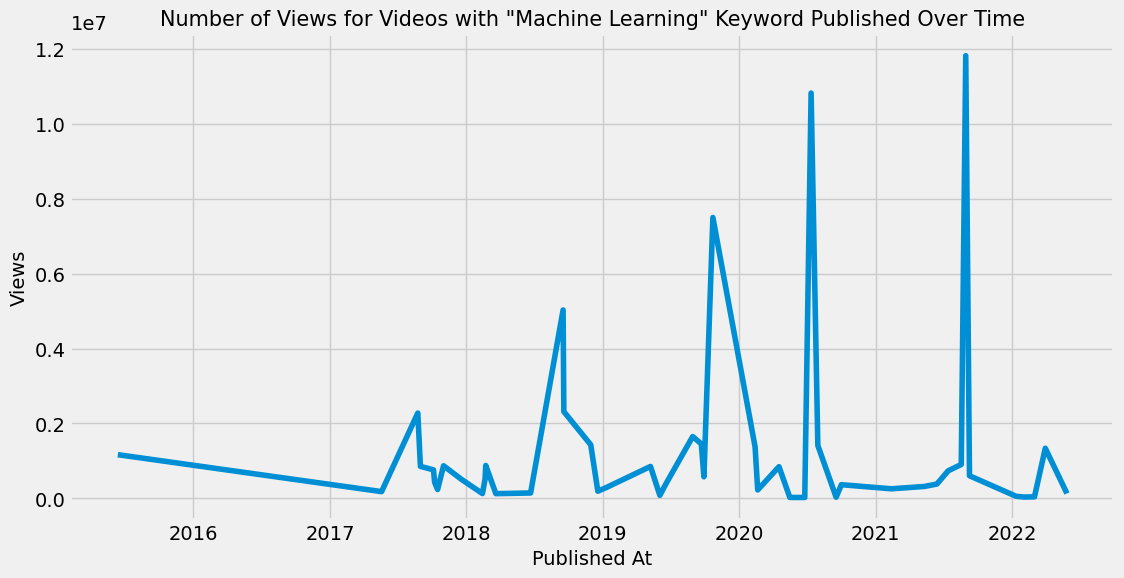

In [15]:
plt.figure(figsize=(12, 6));

ax = sns.lineplot(data=ml_grouped, x='Published At', y="Views")
plt.title('Number of Views for Videos with "Machine Learning" Keyword Published Over Time', fontsize=15);

plt.show()

As discussed above, we can more clearly understand what this graph is visualizing -- in 2022, when this dataset was cultivated, specific well-performing videos about maching learning that were published in 2018 and 2019 recevied far fewer views than the well-performing videos about machine learning that were published in 2020 and 2021. This could mean that in 2020 and 2021, machine learning was a hotter topic than it was in 2018 and 2019, since these well-performing (or "viral") videos received far more views, but it doesn't necessarily definitively mean this.

## Analysis and Visualization: Average Length of Title

For the final graph, I wanted to dive deeper into what could be discovered about the videos when grouping by keyword. So, I grouped the data by the `Keyword` field and visualized the average length of the video titles by keyword.

In [16]:
stats_grouped = stats.groupby("Keyword")["Title"].apply(lambda x: np.mean(x.str.len()))
stats_grouped = stats_grouped.reset_index(name = "Average Title Length")
stats_grouped.head()

,Keyword,Average Title Length
0,animals,47.736842
1,business,61.687500
2,data science,55.860000
3,education,55.083333
4,food,63.937500


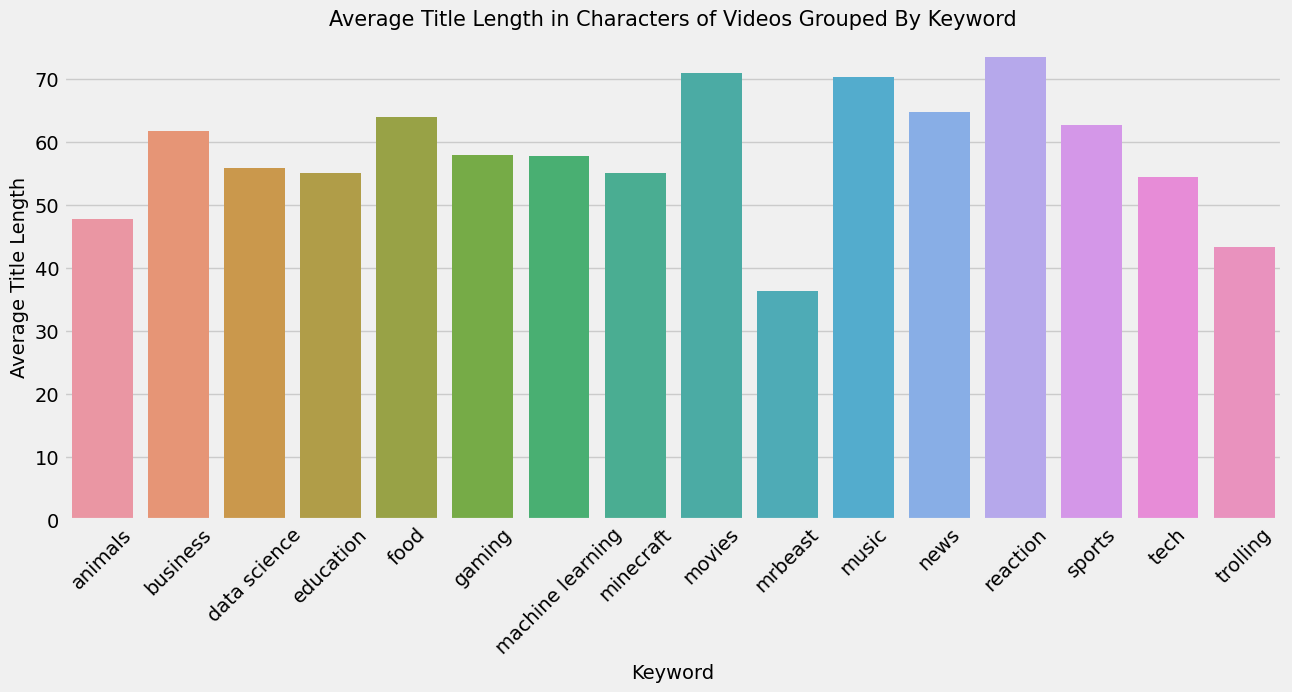

In [17]:
plt.figure(figsize=(14, 6));

ax = sns.barplot(data=stats_grouped, x='Keyword', y="Average Title Length")
plt.title('Average Title Length in Characters of Videos Grouped By Keyword', fontsize=15);
plt.xticks(rotation=45);

plt.show()

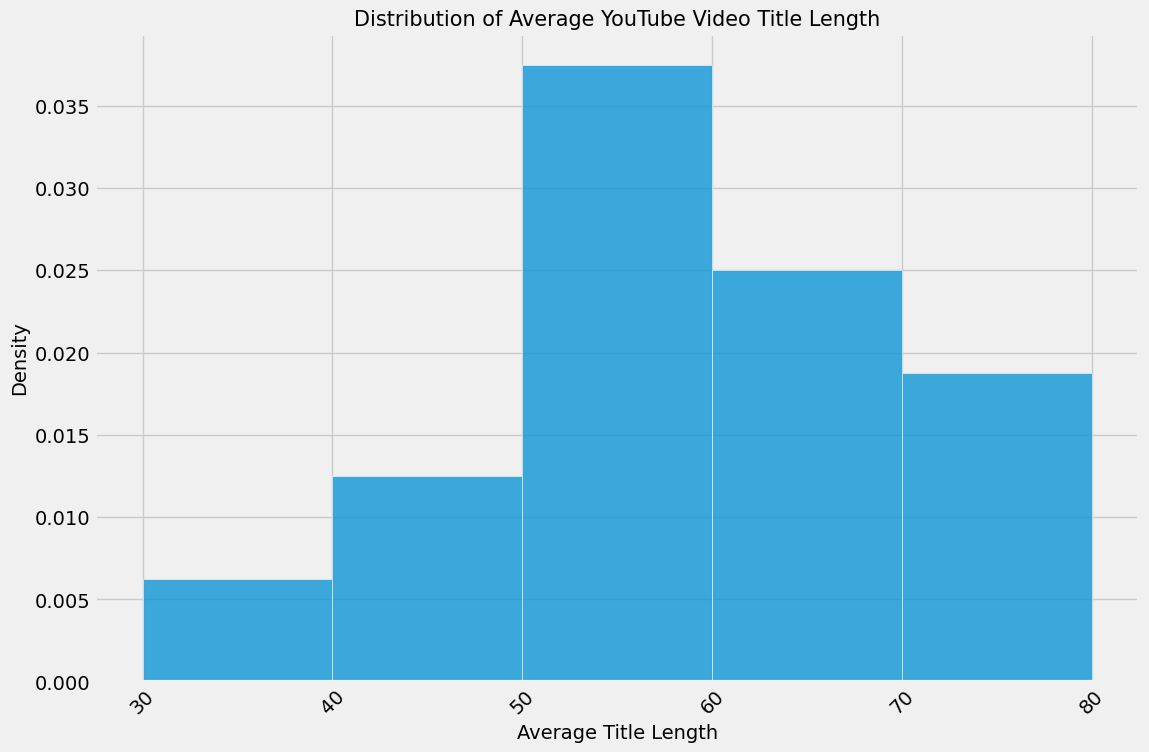

In [18]:
plt.figure(figsize=(12, 8));

ax = sns.histplot(data=stats_grouped, x="Average Title Length", stat="density", bins=[30, 40, 50, 60, 70, 80])
plt.title('Distribution of Average YouTube Video Title Length', fontsize=15);
plt.xticks(rotation=45);

plt.show()

From the graph above in yellow, we see that for the videos in this dataset, the video title length ranges from 30 characters to 80 characters, with the average title length being between 50 and 60 characters. This is insightful for our graph showing the title length grouped by keyword, as it tells us which categories are on the lower end and which are on the higher end.

Videos with the keywords `mrbeast` or `trolling` seem to have the shortest average title lengths, which makes sense when considering the typical audience of these videos. From my own personal experience, these types of videos are typically targeted more towards younger audiences, so their titles might be shorter in order to hook the audience into the premise of the video.

Meanhile, videos with the keywords `reaction` or `movies` tend to have longer video titles on average, which lines up with what their content might be -- in order to be as descriptive as possible in what videos, movies, or content they're reacting to or discussing, they likely need to include more text in their titles to capture the audiences' attention.

## Discoveries and Answering the Research Questions

As stated in the introduction, there were a few primary questions I wanted to explore after taking an initial look at this dataset. Our answers to these questions and discoveries are as follows:

- **Is there any basic relationship between the number of likes and comments?**
    - From the visualization that we created, we can see that there does appear to be a **positive correlation between these two values**, which is likely what one would expect -- the more views a video has, the more comments it is likely to have as well.

- **What can we find when taking a look at the `machine learning` keyword in the YouTube search?**
    - We visualized a time-series analysis of the videos published with the `machine learning` keyword, and while it is difficult to say definitively how the overall interest in this topic changed over time (due to the granularity of our data being individual videos, rather than individual days with the total views for each keyword as a metric), **our graph depicted higher spikes in view counts for the "viral"/well-performing videos about machine learning in 2020 and 2021**, as compared to 2018 and 2019.

- **What information can we discover when we group our data together by keyword?**
    - We took a look at the average video title length grouped by keyword and discovered that, on average, videos with the keywords `mrbeast` and `trolling` had the shortest video title lengths, while videos with the keywords `reaction` and `movies` had the longest video title lengths.

This was just a basic project looking into this data, but if I were to dedicate more time to this research topic (or had slightly different data available), I would be interested in more time-series analysis for a wider range of video topics. This could have practical applications for individuals who are consistent viewers or content creators on YouTube, as it would help them visualize which topics are doing well on YouTube at a given time.